# Used Car Retail Price Recommendation
----
**Final Capstone Project - Dibimbing Machine Learning Batch 3**

**by Reinhard Jonathan Silalahi**

### Requirement installation

In [1]:
# !pip install -r requirements.txt

### Connect to PostgreSQL Database and Load Data

In [2]:
from sqlalchemy import create_engine
import pandas as pd

# Define the database connection parameters
username = 'postgres'
password = 'password'
host = 'localhost'
port = '5432'  # Default PostgreSQL port
database = 'db_scrapper'

# Create the database connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

# Query to get the data
query = '''
select 
	brand.name as brand, 
	model.name as model, 
	type.name as type, 
	color.name as color,
	year, 
	mileage, 
	transmission, 
	engine_capacity, 
	condition,
    price,
	province, 
	region,
    scrapper.data_source
from scrapper
join brand on scrapper.brand_id = brand.id
join model on scrapper.model_id = model.id
join type on scrapper.type_id = type.id
join color on scrapper.color_id = color.id
'''

# Load data into a DataFrame
df = pd.read_sql(query, engine)

# Convert transmission string to int
transmission_map = {'MANUAL': 0, 'AUTOMATIC': 1}
df['transmission'] = df['transmission'].apply(lambda row: transmission_map.get(row, -1))

# Close the connection (if necessary)
engine.dispose()

In [3]:
# Display basic information
print(df.info())

# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886824 entries, 0 to 886823
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   brand            886824 non-null  object 
 1   model            886824 non-null  object 
 2   type             886824 non-null  object 
 3   color            886824 non-null  object 
 4   year             886824 non-null  int64  
 5   mileage          886824 non-null  int64  
 6   transmission     886824 non-null  int64  
 7   engine_capacity  886824 non-null  int64  
 8   condition        886824 non-null  object 
 9   price            886824 non-null  float64
 10  province         886709 non-null  object 
 11  region           886824 non-null  object 
 12  data_source      886824 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 88.0+ MB
None
           brand          model                    type  color  year  mileage  \
0         Toyota  Kijang Innova    

### Data sources

### Missing Value Handling

In [4]:
df.dropna()

,brand,model,type,color,year,mileage,transmission,engine_capacity,condition,price,province,region,data_source
0,Toyota,Kijang Innova,LAINNYA,Hijau,2005,120000,1,0,USED_CAR,1.050000e+08,Jawa Timur,Indonesia,OLX
1,Mercedes-Benz,CLA200,1.6 SPORT,Hitam,2018,105000,1,0,USED_CAR,5.950000e+08,Jakarta D.K.I.,Indonesia,OLX
2,Toyota,Agya,LAINNYA,Merah,2015,90000,1,0,USED_CAR,9.000000e+07,Jakarta D.K.I.,Indonesia,OLX
3,Hyundai,Creta,1.5 PRIME IVT TWO TONE,Putih,2022,30000,1,0,USED_CAR,3.020000e+08,Banten,Indonesia,OLX
4,Mazda,CX-5,2.5 TOURING,Putih,2016,85000,1,0,USED_CAR,2.350000e+08,Jakarta D.K.I.,Indonesia,OLX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886819,Porsche,911,LAINNYA,Lainnya,2024,301000,0,0,USED_CAR,7.700000e+09,Jakarta D.K.I.,Indonesia,OLX
886820,Porsche,911,3.8 TURBO S,Putih,2012,25000,1,0,USED_CAR,2.550000e+09,Jakarta D.K.I.,Indonesia,OLX
886821,Porsche,911,3.8 CARRERA S,Putih,2013,15000,1,0,USED_CAR,3.100000e+09,Riau,Indonesia,OLX
886822,Porsche,911,3.8 CARRERA S,Putih,2012,30000,1,0,USED_CAR,2.700000e+09,Jawa Barat,Indonesia,OLX


### Remove Duplicates

In [5]:
print("Count before removing duplicate rows: ", df.shape)
beforeDuplicatesDrop = df.duplicated().sum()
print("Total duplicate rows: ", beforeDuplicatesDrop)

df = df.drop_duplicates()
print("Count after removing duplicate rows: ", df.shape)

Count before removing duplicate rows:  (886824, 13)
Total duplicate rows:  167076
Count after removing duplicate rows:  (719748, 13)


### Encoding

In [6]:
import datetime
from sklearn.preprocessing import LabelEncoder

# Calculate age from the year
df['age'] = datetime.datetime.now().year - df['year']

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
categorical_columns = ['brand', 'model', 'type', 'color', 'transmission', 'condition', 'province', 'region']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[column] = le

In [7]:
unique_values = df['data_source'].unique()
print(f"\n{'data_source'}:")
print(f"Data sources: {unique_values}")



data_source:
Data sources: ['OLX' 'CARMUDI']


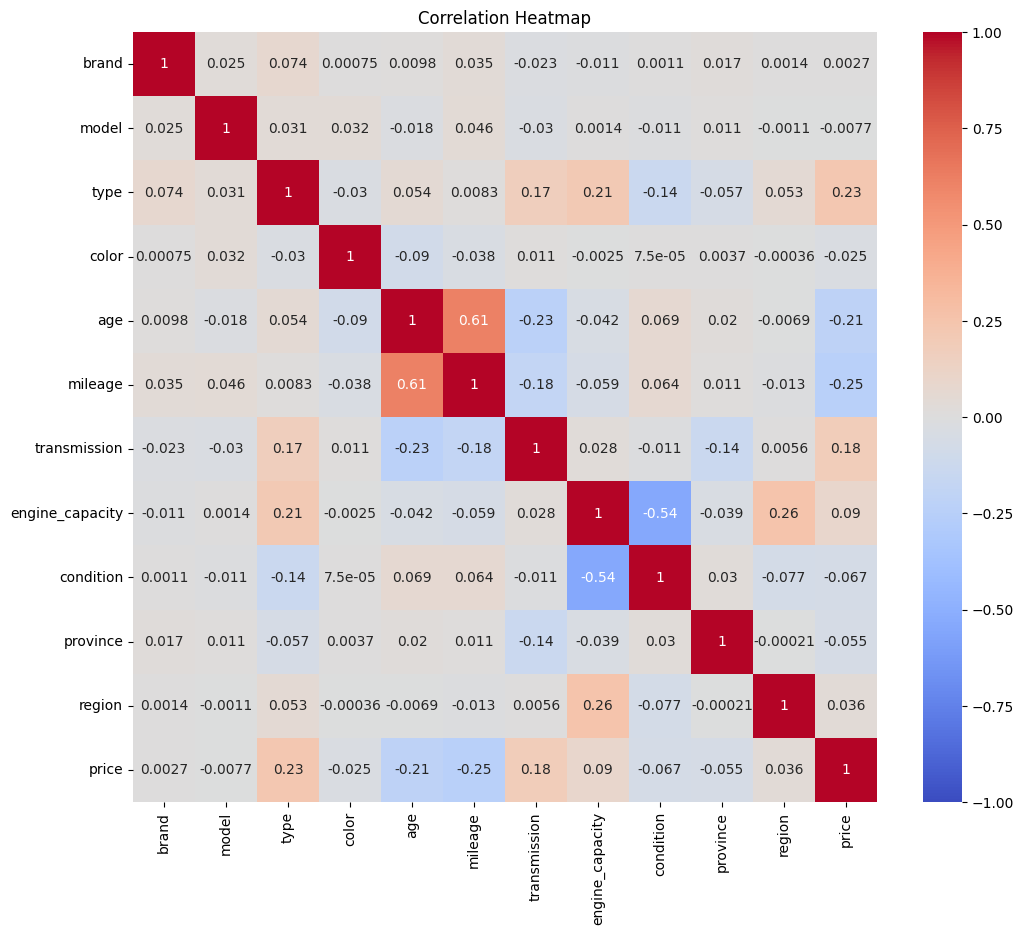

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
correlation_matrix = df[['brand', 'model', 'type', 'color', 'age', 'mileage', 'transmission', 'engine_capacity', 'condition', 'province', 'region', 'price']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()